In [10]:
import pandas as pd
import numpy as np
from libs.simple_processing import separate_target

DATA = pd.read_csv('xor.csv', delimiter=';')

X, y = separate_target(DATA, 'y')

print(X.shape)
print('y:', y.shape)


(4, 2)
y: (4,)


In [95]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.0005,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True,
)
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=40)

X_train = X.copy()
y_train = y.copy()
X_valid = X.copy()
y_valid = y.copy()

input_shape = [X_train.shape[1]]
print(input_shape)
print(X_train.shape)

[2]
(4, 2)


In [3]:
print(X_train)
print(y_train)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
0    0
1    1
2    1
3    0
Name: y, dtype: int64


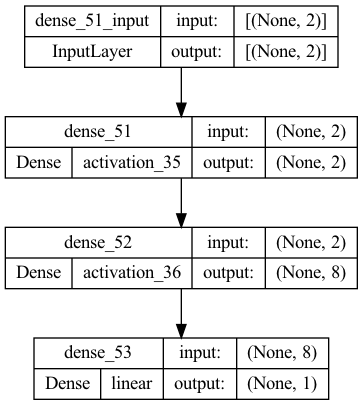

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Activation
# from tensorflow.keras import layers
from tensorflow.keras import activations


def activation_function(tensor):
    return tf.cast(tensor, dtype=tf.int32)

    # return tf.math.round(tensor, name=None)

model = keras.Sequential()
model.add(layers.Dense(2, activation=Activation('relu'), input_shape=input_shape))
# model.add(layers.Dense(8, activation=Activation('relu')))
# model.add(layers.Dense(2, activation=Activation(activation_function), input_shape=input_shape))
model.add(layers.Dense(8, activation=Activation('relu')))
# model.add(layers.Dense(8, activation=Activation(activation_function)))
model.add(layers.Dense(1))

keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, expand_nested=True)

In [97]:

accuracy = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.51
)

model.compile(
    optimizer='adam',
     # loss='mae',
    loss='mean_squared_error',
    metrics=[accuracy]
    # metrics=['binary_accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=4,
    epochs=1050
    , callbacks=[early_stopping]
    , use_multiprocessing=True
    , verbose='0'
)
# Generates pdf with network structure
# ann_viz(model, title="XOR")
# graph = Source.from_file('network.gv')
# graph

Epoch 1/1050


2022-12-01 20:25:48.002653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/1050
Epoch 3/1050
Epoch 4/1050
Epoch 5/1050


2022-12-01 20:25:48.240319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 6/1050
Epoch 7/1050
Epoch 8/1050
Epoch 9/1050
Epoch 10/1050
Epoch 11/1050
Epoch 12/1050
Epoch 13/1050
Epoch 14/1050
Epoch 15/1050
Epoch 16/1050
Epoch 17/1050
Epoch 18/1050
Epoch 19/1050
Epoch 20/1050
Epoch 21/1050
Epoch 22/1050
Epoch 23/1050
Epoch 24/1050
Epoch 25/1050
Epoch 26/1050
Epoch 27/1050
Epoch 28/1050
Epoch 29/1050
Epoch 30/1050
Epoch 31/1050
Epoch 32/1050
Epoch 33/1050
Epoch 34/1050
Epoch 35/1050
Epoch 36/1050
Epoch 37/1050
Epoch 38/1050
Epoch 39/1050
Epoch 40/1050
Epoch 41/1050
Epoch 42/1050
Epoch 43/1050
Epoch 44/1050
Epoch 45/1050
Epoch 46/1050
Epoch 47/1050
Epoch 48/1050
Epoch 49/1050
Epoch 50/1050
Epoch 51/1050
Epoch 52/1050
Epoch 53/1050
Epoch 54/1050
Epoch 55/1050
Epoch 56/1050
Epoch 57/1050
Epoch 58/1050
Epoch 59/1050
Epoch 60/1050
Epoch 61/1050
Epoch 62/1050
Epoch 63/1050
Epoch 64/1050
Epoch 65/1050
Epoch 66/1050
Epoch 67/1050
Epoch 68/1050
Epoch 69/1050
Epoch 70/1050
Epoch 71/1050
Epoch 72/1050
Epoch 73/1050
Epoch 74/1050
Epoch 75/1050
Epoch 76/1050
Epoch 77/1

In [98]:
print(model.summary())
history_df = pd.DataFrame(history.history)
print(history_df)
print("Minimum Validation Loss: {:0.5f}".format(history_df['val_loss'].min()))
print("Max Validation Accuracy: {:0.5f}".format(history_df['val_binary_accuracy'].max()))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 2)                 6         
                                                                 
 dense_52 (Dense)            (None, 8)                 24        
                                                                 
 dense_53 (Dense)            (None, 1)                 9         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________
None
         loss  binary_accuracy  val_loss  val_binary_accuracy
0    0.451414             0.50  0.448109                 0.50
1    0.448109             0.50  0.444826                 0.50
2    0.444826             0.50  0.441566                 0.50
3    0.441566             0.50  0.438329                 0.50
4    0

In [99]:
# print(model.predict(np.array([[0, 1]])).round())
print(model.predict(np.array([[0, 0]])))
print(model.predict(np.array([[0, 1]])))

1/1 [==============================] - 0s 75ms/step


2022-12-01 20:26:18.340285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[0.45346427]]
1/1 [==============================] - 0s 13ms/step
[[0.4533695]]


<AxesSubplot: >

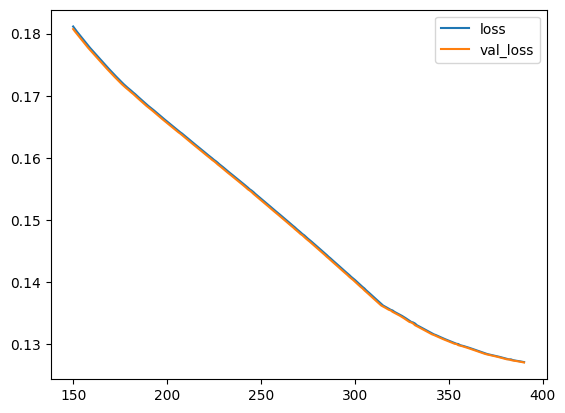

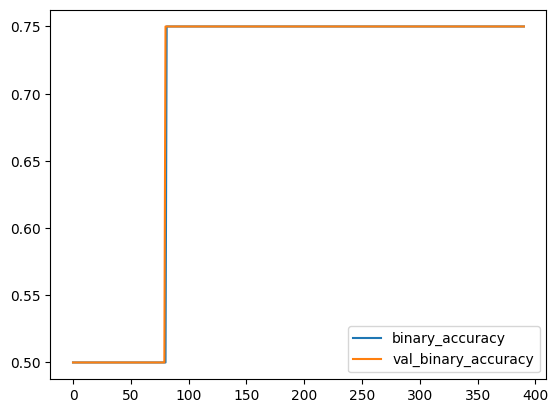

In [100]:
history_df.loc[150:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
# weights = model.layers[1].get_weights()[0]
# biases = model.layers[1].get_weights()[1]
# print('weights: ', weights)
# print('biases: ', biases)

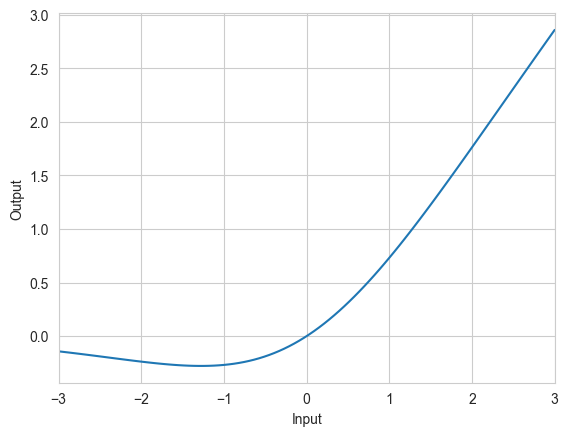

In [4]:
# Change 'relu' to 'elu', 'selu', 'swish', sigmoid... or something else
# How different activation functions look like
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

# print(tf.__version__)

activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)  # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()